#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [2]:
import torch
import torchvision
import torchvision.transforms.v2 as T

In [3]:
trainset = torchvision.datasets.CIFAR10(
    root="./cifar10",
    download=True,
    train=True,
)

100%|██████████| 170M/170M [00:41<00:00, 4.15MB/s] 


Extracting ./cifar10\cifar-10-python.tar.gz to ./cifar10


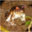

In [ ]:
trainset[0][0]

In [5]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

trainset = torchvision.datasets.CIFAR10(
    root="./cifar10",
    download=True,
    train=True,
    transform=transform
)

c:\Users\Danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified


In [34]:
trainset[0][0].shape

torch.Size([3, 32, 32])

In [27]:
trainset[0][0]

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [8]:
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_block1 = nn.Sequential(
      nn.Conv2d(
          in_channels=3,
          out_channels=6,
          kernel_size=3,
      ),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),
    )

    self.conv_block2 = nn.Sequential(
      nn.Conv2d(
          in_channels=6,
          out_channels=2,
          kernel_size=3,
      ),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),
    )
    self.classifier = nn.Linear(72, 10)


  def forward(self, X):
    out = self.conv_block1(X)
    out = self.conv_block2(out)

    out = out.flatten(start_dim=1)
    out = self.classifier(out)

    return out

In [9]:
from torch.utils.data import DataLoader

loader = DataLoader(trainset, batch_size=16)
X, y = next(iter(loader))

In [10]:
X.shape

torch.Size([16, 3, 32, 32])

In [11]:
model = CNN()
out = model(X)

In [12]:
out.shape

torch.Size([16, 10])

In [13]:
conv1 = nn.Conv2d(3, 6, (5, 7))
conv1.weight.shape

torch.Size([6, 3, 5, 7])

<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

При расчете статистики для нормализации считайте, что вы можете загрузить весь набор данных в память сразу. Однако рекомендуется реализовать подход для получения статистики на основе батчей, так как такое решение в перспективе может позволить обработать датасет, который не помещается в память целиком.

- [ ] Проверено на семинаре

In [1]:
import torchvision.transforms.v2 as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch as th
import numpy as np
import torchmetrics as M
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
transform = T.Compose([
    T.Resize((300, 300)), 
    T.ToTensor()
])

dataset = ImageFolder(root='./cat_breeds_4/cat_breeds_4', transform=transform)
loader = DataLoader(dataset, batch_size=32)

c:\Users\Danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [4]:
mean = 0.0
std = 0.0
total_images = 0

for images, _ in loader:
    batch_samples = images.size(0)  
    total_images += batch_samples
    mean += images.mean([0, 2, 3]) * batch_samples
    std += images.std([0, 2, 3]) * batch_samples

mean /= total_images
std /= total_images

mean, std

(tensor([0.5000, 0.4514, 0.4066]), tensor([0.2630, 0.2572, 0.2560]))

In [5]:
transform = T.Compose([
    T.Resize((300, 300)), 
    T.ToTensor(),
    T.Normalize(mean, std)
])

dataset = ImageFolder(root='./cat_breeds_4/cat_breeds_4', transform=transform)
train_dataset, test_dataset = random_split(dataset, [0.8, 0.2])
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)
print(f"Количество изображений в датасете: {len(dataset)}")
print(f"Размер одной картинки: {dataset[0][0].shape}")
print(f"Количество уникальных классов: {len(dataset.classes)}")

Количество изображений в датасете: 4000
Размер одной картинки: torch.Size([3, 300, 300])
Количество уникальных классов: 4


<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

In [6]:
def train_model_with_metrics(model, criterion, optimizer, train_loader, test_loader, n_epochs=1000, print_every=100):
    epoch_losses = []
    accuracy_scores = []
    test_accuracies = []

    loss_metric = M.MeanMetric().to(device)  
    accuracy_metric = M.Accuracy(task='multiclass', num_classes=len(dataset.classes)).to(device)  

    for epoch in range(n_epochs + 1):
        loss_metric.reset()
        accuracy_metric.reset()

        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            loss_metric.update(loss)
            accuracy_metric.update(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        
        epoch_loss = loss_metric.compute().item()
        accuracy = accuracy_metric.compute().item()
        epoch_losses.append(epoch_loss)
        accuracy_scores.append(accuracy)

        model.eval()
        test_accuracy_metric = M.Accuracy(task='multiclass', num_classes=len(dataset.classes)).to(device)
        with th.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = model(X_batch)
                test_accuracy_metric.update(y_pred, y_batch)
        test_accuracies.append(test_accuracy_metric.compute().item())

        if epoch % print_every == 0:
            print(f'Epoch [{epoch}/{n_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')

    return epoch_losses, accuracy_scores, test_accuracies

In [ ]:
model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(np.prod(dataset[0][0].shape), 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 4),
        ).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

epoch_losses, accuracy_scores, test_accuracies = train_model_with_metrics(model, criterion, optimizer, train_loader, test_loader, n_epochs=15, print_every=1)

Epoch [0/15], Loss: 11.1422, Train Accuracy: 0.3063, Test Accuracy: 0.3338
Epoch [1/15], Loss: 4.5137, Train Accuracy: 0.4078, Test Accuracy: 0.2988
Epoch [2/15], Loss: 2.3562, Train Accuracy: 0.5259, Test Accuracy: 0.3150
Epoch [3/15], Loss: 1.3678, Train Accuracy: 0.6069, Test Accuracy: 0.3600
Epoch [4/15], Loss: 0.9637, Train Accuracy: 0.7013, Test Accuracy: 0.3537
Epoch [5/15], Loss: 0.7847, Train Accuracy: 0.7747, Test Accuracy: 0.3675
Epoch [6/15], Loss: 0.4846, Train Accuracy: 0.8369, Test Accuracy: 0.3613
Epoch [7/15], Loss: 0.3755, Train Accuracy: 0.8747, Test Accuracy: 0.3875
Epoch [8/15], Loss: 0.2451, Train Accuracy: 0.9262, Test Accuracy: 0.3900
Epoch [9/15], Loss: 0.1771, Train Accuracy: 0.9538, Test Accuracy: 0.4150
Epoch [10/15], Loss: 0.1492, Train Accuracy: 0.9653, Test Accuracy: 0.3837
Epoch [11/15], Loss: 0.1033, Train Accuracy: 0.9794, Test Accuracy: 0.3975
Epoch [12/15], Loss: 0.0810, Train Accuracy: 0.9828, Test Accuracy: 0.3938
Epoch [13/15], Loss: 0.0634, Train

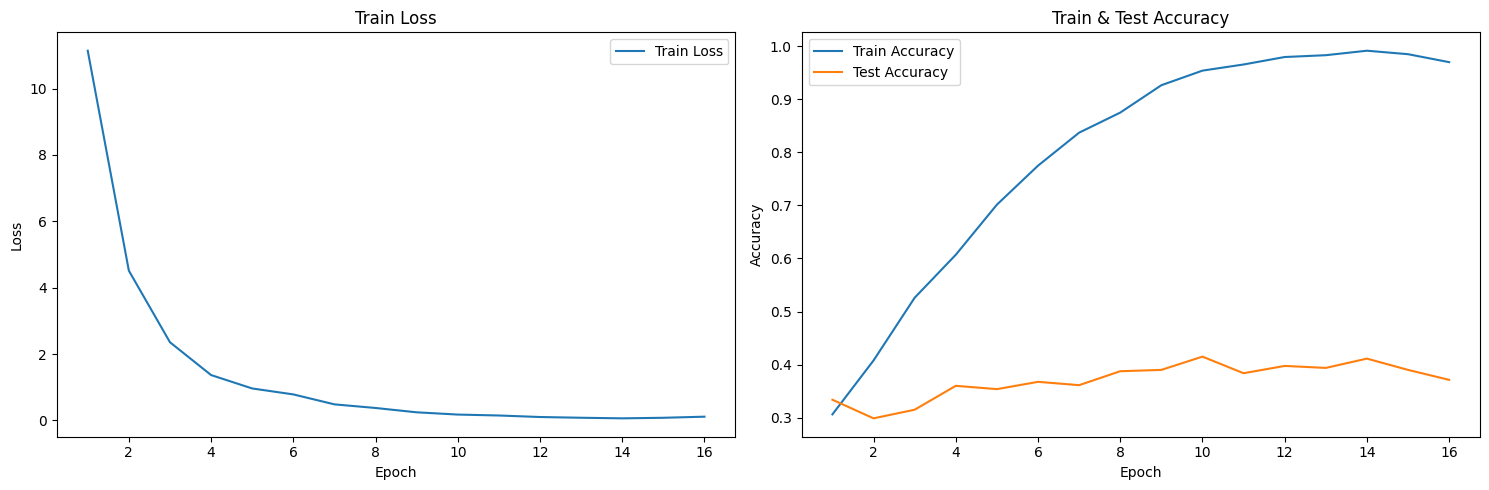

In [102]:
epochs = range(1, len(epoch_losses) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_scores, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train & Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [127]:
accuracy_scores[-1], test_accuracies[-1]

(0.9696875214576721, 0.3712500035762787)

In [130]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Количество параметров модели: {count_parameters(model)}")

Количество параметров модели: 69153668


<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

In [7]:
def denormalize(image, mean, std):
    mean = mean.clone().detach().view(3, 1, 1)
    std = std.clone().detach().view(3, 1, 1)
    return image * std + mean

def show_examples(model, test_loader, classes, k=6):
    model.eval()

    images, true_labels = [], []
    for X_batch, y_batch in test_loader:
        images.extend(X_batch)
        true_labels.extend(y_batch)
    
    
    indices = random.sample(range(len(images)), k)

    selected_images = [images[i].to(device) for i in indices]
    selected_labels = [true_labels[i] for i in indices]
    selected_images_tensor = th.stack(selected_images)

    with th.no_grad():
        outputs = model(selected_images_tensor)
        pred_labels = th.argmax(outputs, dim=1).cpu()

    fig, axes = plt.subplots(1, k, figsize=(15, 5))
    for i, idx in enumerate(indices):
        ax = axes[i]
        image = denormalize(images[idx].cpu(), mean, std).permute(1, 2, 0)  # Денормализуем и меняем размерности
        true_label = classes[selected_labels[i]]
        pred_label = classes[pred_labels[i]]
        
        ax.imshow(image)
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

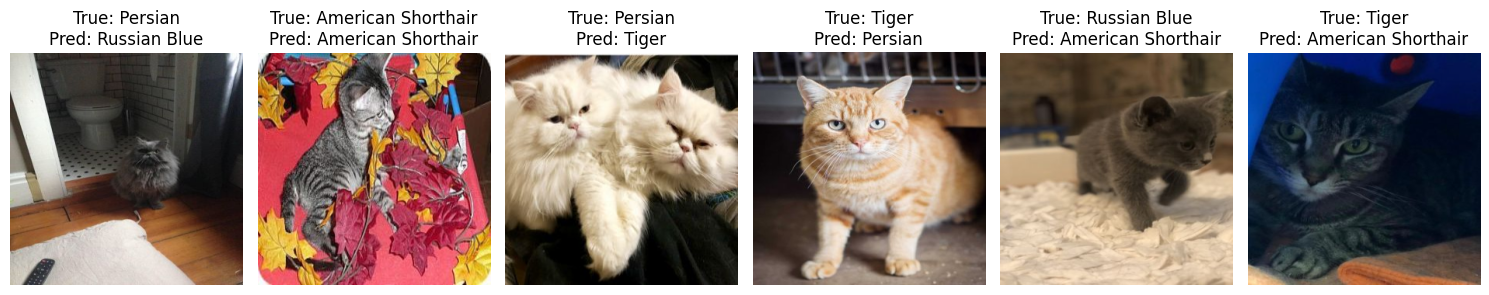

In [123]:
show_examples(model, test_loader, dataset.classes)

<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

Сохраните веса обученной модели на диск.

- [ ] Проверено на семинаре

In [8]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=6,
                kernel_size=3,
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=6,
                out_channels=16,
                kernel_size=3,
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        
        self.classifier = nn.Linear(16 * 73 * 73, num_classes) 

    def forward(self, X):
        out = self.conv_block1(X)
        out = self.conv_block2(out)
        out = out.flatten(start_dim=1)  
        out = self.classifier(out)
        return out

In [9]:
model = CNN(num_classes=len(dataset.classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = th.optim.AdamW(model.parameters(), lr=0.001)

epoch_losses, accuracy_scores, test_accuracies = train_model_with_metrics(
    model, criterion, optimizer, train_loader, test_loader, n_epochs=15, print_every=1)

Epoch [0/15], Loss: 3.8755, Train Accuracy: 0.2525, Test Accuracy: 0.2850
Epoch [1/15], Loss: 1.6646, Train Accuracy: 0.3047, Test Accuracy: 0.2837
Epoch [2/15], Loss: 1.3736, Train Accuracy: 0.3584, Test Accuracy: 0.3462
Epoch [3/15], Loss: 1.2924, Train Accuracy: 0.4162, Test Accuracy: 0.3875
Epoch [4/15], Loss: 1.2523, Train Accuracy: 0.4819, Test Accuracy: 0.3787
Epoch [5/15], Loss: 1.2037, Train Accuracy: 0.5091, Test Accuracy: 0.4225
Epoch [6/15], Loss: 1.1312, Train Accuracy: 0.5647, Test Accuracy: 0.4387
Epoch [7/15], Loss: 1.0368, Train Accuracy: 0.6009, Test Accuracy: 0.4450
Epoch [8/15], Loss: 0.9265, Train Accuracy: 0.6631, Test Accuracy: 0.4737
Epoch [9/15], Loss: 0.8183, Train Accuracy: 0.7141, Test Accuracy: 0.4512
Epoch [10/15], Loss: 0.6993, Train Accuracy: 0.7694, Test Accuracy: 0.4825
Epoch [11/15], Loss: 0.5989, Train Accuracy: 0.8062, Test Accuracy: 0.4563
Epoch [12/15], Loss: 0.4994, Train Accuracy: 0.8547, Test Accuracy: 0.4663
Epoch [13/15], Loss: 0.4135, Train 

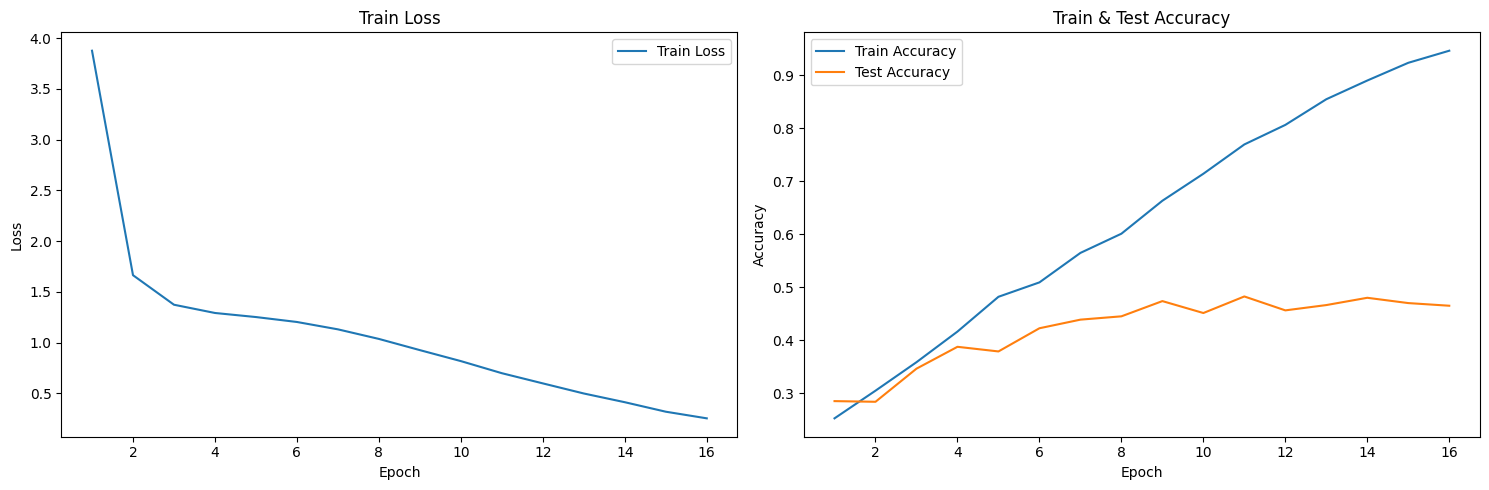

In [10]:
epochs = range(1, len(epoch_losses) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_scores, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train & Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
accuracy_scores[-1], test_accuracies[-1]

(0.9462500214576721, 0.4650000035762787)

In [12]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Количество параметров модели: {count_parameters(model)}")

Количество параметров модели: 342108


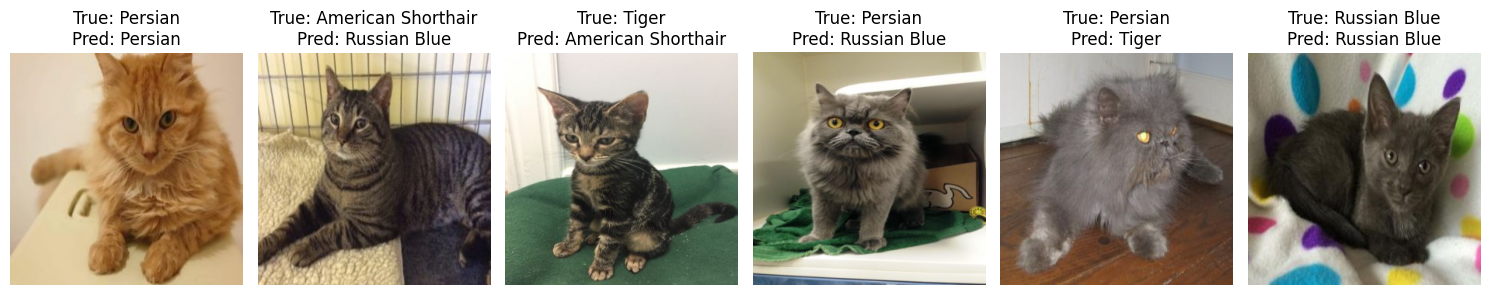

In [13]:
show_examples(model, test_loader, dataset.classes)

<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре

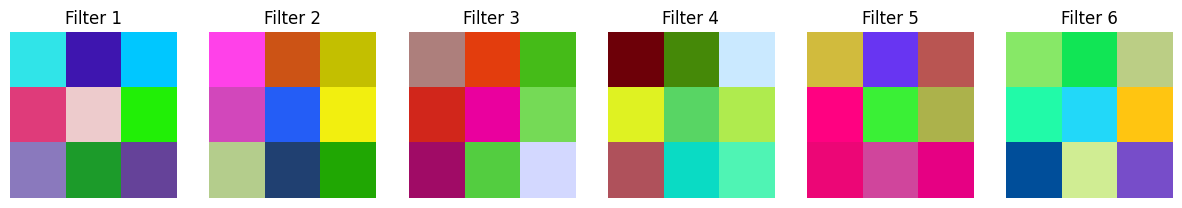

In [29]:
conv1_weights = model.conv_block1[0].weight.data.cpu()  

fig, axes = plt.subplots(1, min(6, conv1_weights.shape[0]), figsize=(15, 5))
for i in range(min(6, conv1_weights.shape[0])):
    ax = axes[i]
    normalized_filter = (conv1_weights[i] - conv1_weights[i].min()) / (conv1_weights[i].max() - conv1_weights[i].min())
    ax.imshow(normalized_filter.permute(1, 2, 0).numpy())
    ax.axis('off')
    ax.axis('off')
    ax.set_title(f"Filter {i+1}")
plt.show()

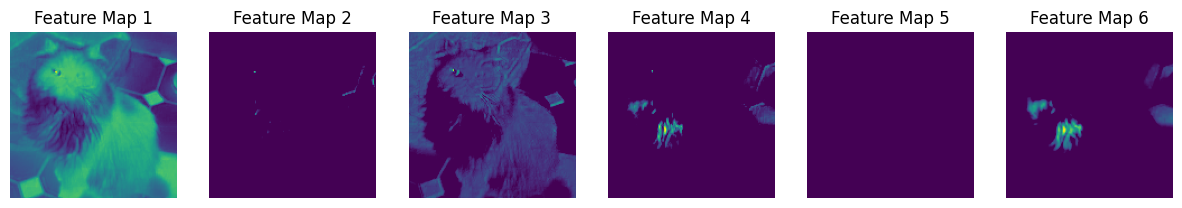

In [ ]:
test_image, _ = next(iter(test_loader))
test_image = test_image[0].unsqueeze(0).to(device)

with th.no_grad():
    conv1_output = model.conv_block1(test_image)

conv1_output = conv1_output.squeeze(0).cpu().numpy() 

num_features = conv1_output.shape[0]
fig, axes = plt.subplots(1, min(6, num_features), figsize=(15, 5))
for i in range(min(6, num_features)):
    ax = axes[i]
    ax.imshow(conv1_output[i], cmap='viridis')
    ax.axis('off')
    ax.set_title(f"Feature Map {i+1}")
plt.show()